In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
df['labels']=df['class'].map({0:"Hate Speech detected", 1:"Offensive language detected", 2:"No hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No hate and offensive speech  
1   Offensive language detected  
2   Offensive language detected  
3   Offensive language detected  
4   Offensive language detected  


In [5]:
df = df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


In [6]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|www\.\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                         labels  
0  No hate and offensive speech  
1   Offensive language detected  
2   Offensive language detected  
3   Offensive language detected  
4   Offensive language detected  


<Axes: xlabel='labels', ylabel='count'>

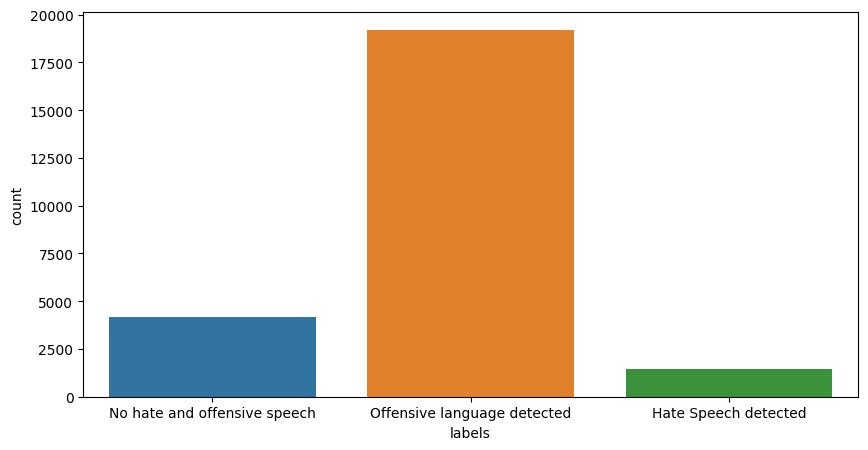

In [9]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='labels', data=df)

Text(0.5, 1.0, 'Distribution of sentiments')

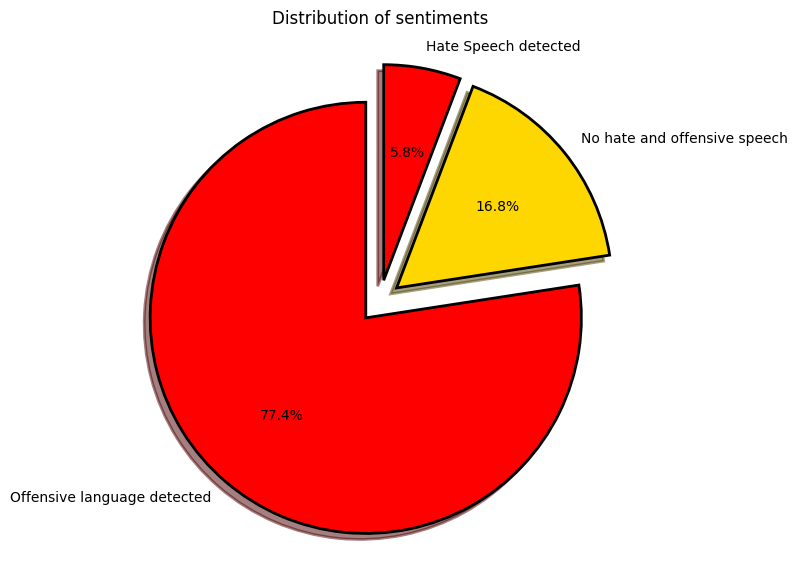

In [11]:
fig=plt.figure(figsize=(7,7))
colors=("red","gold")
wp={'linewidth':2, 'edgecolor':"black"}
tags=df['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')

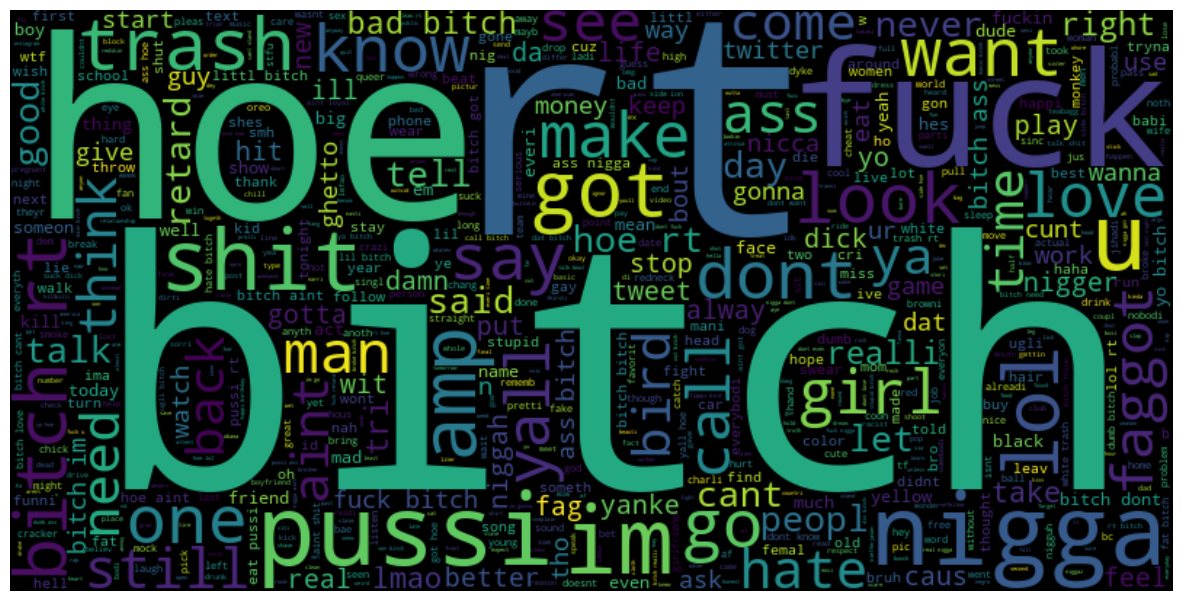

In [12]:
from wordcloud import WordCloud
text=' '.join([word for word in df['tweet']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud=WordCloud(max_words=1000, width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
df=df.dropna()

In [14]:
x=np.array(df['tweet'])
y=np.array(df['labels'])


In [15]:
df.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate and offensive speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language detected
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language detected
3,rt cganderson vivabas look like tranni,Offensive language detected
4,rt shenikarobert shit hear might true might f...,Offensive language detected


In [16]:
cv=CountVectorizer()

In [17]:
X=cv.fit_transform(x)

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
model=DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
test_data="I will Kill You"
df=cv.transform({test_data}).toarray()
print(model.predict(df))

['Hate Speech detected']


In [22]:
test_data="You are a bitch"
df=cv.transform({test_data}).toarray()
print(model.predict(df))

['Offensive language detected']


In [23]:
test_data="You are amazing"
df=cv.transform({test_data}).toarray()
print(model.predict(df))

['No hate and offensive speech']
